In [1]:
import pandas as pd

In [2]:
# create sample data
my_df = pd.DataFrame({
    'input1': [15, 41, 44, 47, 50, 53, 56, 59, 99],
    'input2': [29, 41, 44, 47, 50, 53, 56, 59, 66]
})
my_df

,input1,input2
0,15,29
1,41,41
2,44,44
3,47,47
4,50,50
5,53,53
6,56,56
7,59,59
8,99,66


<AxesSubplot:>

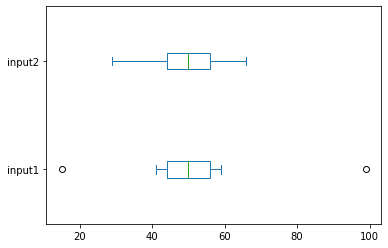

In [3]:
# visualize with box plot
my_df.plot(kind = 'box', vert = False) # displays horizontal boxplot

# values from input2 are all reasonably contained within the boxplot limits
# values from input1 have two outliers below and above the min/max

In [4]:
# create a list that contains the vairable names to apply outlier logic
# in real world scenarios it is unlikely you will apply logic to all variables
outlier_columns = ['input1', 'input2']

In [5]:
# boxplot approach (for loop will search for an remove outliers)
for col in outlier_columns:
    # calculate lower and upper quartiles
    lower_quartile = my_df[col].quantile(0.25)
    upper_quartile = my_df[col].quantile(0.75)

    # caluclate interquartile range
    iqr = upper_quartile - lower_quartile

    # calucalte extended interquartile range using a factor of 1.5
    iqr_extended = iqr * 1.5

    # calcualte max and min borders using extended iqr (these are the vertical ticks outside the boxplot)
    max_border = upper_quartile + iqr_extended
    min_border = lower_quartile - iqr_extended

    # return index value for outliers
    outliers = my_df[(my_df[col] < min_border) | (my_df[col] > max_border)].index 

    # print results
    print(f'Column [{col}]: Removed {len(outliers)} Outliers. \n \t Index: {outliers}')

    # remove outliers
    my_df.drop(outliers, inplace = True)

my_df

Column [input1]: Removed 2 Outliers. 
 	 Index: Int64Index([0, 8], dtype='int64')
Column [input2]: Removed 0 Outliers. 
 	 Index: Int64Index([], dtype='int64')


,input1,input2
1,41,41
2,44,44
3,47,47
4,50,50
5,53,53
6,56,56
7,59,59


In [6]:
# create sample data v2
my_new_df = pd.DataFrame({
    'input1': [15, 41, 44, 47, 50, 53, 56, 59, 99],
    'input2': [29, 41, 44, 47, 50, 53, 56, 59, 66]
})
my_new_df

,input1,input2
0,15,29
1,41,41
2,44,44
3,47,47
4,50,50
5,53,53
6,56,56
7,59,59
8,99,66


In [7]:
# standard deviation approach (more commonly used)
for col in outlier_columns:
    # calcualte mean and std_dev
    mean = my_new_df[col].mean()
    std_dev = my_new_df[col].std()

    # calcualte max and min borders using 3 std_dev
    max_border = mean + std_dev * 3
    min_border = mean - std_dev * 3
    
    # return index value for outliers
    outliers = my_df[(my_df[col] < min_border) | (my_df[col] > max_border)].index 

    # print results
    print(f'Column [{col}]: Removed {len(outliers)} Outliers. Index: {outliers}')

    # remove outliers
    my_df.drop(outliers, inplace = True)

my_new_df

Column [input1]: Removed 0 Outliers. Index: Int64Index([], dtype='int64')
Column [input2]: Removed 0 Outliers. Index: Int64Index([], dtype='int64')


,input1,input2
0,15,29
1,41,41
2,44,44
3,47,47
4,50,50
5,53,53
6,56,56
7,59,59
8,99,66


Either approach will work. In this scenario, the standard deviation approach did not remove any outliers. This is because we are using a very small sample data set and the standard deviation was high to begin with. Always consider the impact of each approach when deciding, and make sure removing outliers all together is truly the best choice for your model performance and accuracy.